In [93]:
import vonenet
import torchvision
import torch
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Load V1 model
v1_model = vonenet.get_model(model_arch=None, pretrained=False, noise_mode=None).module

print(v1_model)

Neuronal distributions gabor parameters
Model:  VOneNet
VOneBlock(
  (simple_conv_q0): GFB()
  (simple_conv_q1): GFB()
  (simple): ReLU(inplace=True)
  (complex): Identity()
  (gabors): Identity()
  (noise): ReLU(inplace=True)
  (output): Identity()
)


In [95]:
data_path = '/braintree/data2/active/common/imagenet_raw/val'

bsize=16

normalize = torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                             std=[0.5, 0.5, 0.5])
dataset = torchvision.datasets.ImageFolder(data_path,
    torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]))

data_loader = torch.utils.data.DataLoader(dataset, batch_size=bsize, shuffle=True, num_workers=20, pin_memory=True)

dataloader_iterator = iter(data_loader)

In [96]:
X, _ = next(dataloader_iterator)
print(v1_activations.shape)

In [105]:
v1_activations = v1_model(X)
print(X.shape)

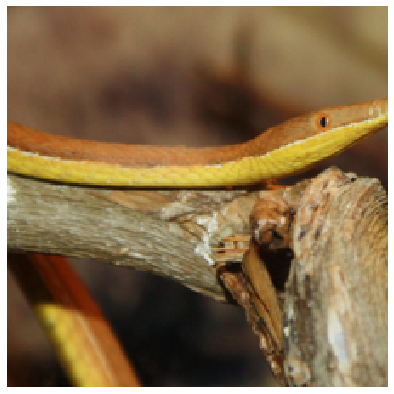

In [107]:
im_ind=0

input_im = np.moveaxis(X[im_ind].numpy(),0,-1)
input_im = input_im/2 +0.5
    
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(7,7)
im_h=ax.imshow(input_im)
im_h.set_clim([0, 1])
ax.set_axis_off()
plt.show()

In [108]:
np.argsort(np.std(v1_activations[im_ind].numpy().reshape((512, -1)), axis=1))

array([393, 153, 254, 503,  63, 235,   1,  55,  35, 206,  79, 199, 216,
       295, 348, 500, 157,  32, 242, 286, 316, 480,  34, 168, 371, 336,
       402,  67,  11, 142, 249, 224, 120, 443, 457,  87, 472, 363, 413,
       245, 335,  10, 323, 209, 269, 406, 461, 246, 247, 112, 207,  62,
       146, 464, 373, 488, 501, 409, 103, 106, 257, 386, 375,  97, 434,
       266, 510, 467,  99, 498, 504, 433,  41,  57, 426,  74, 276, 372,
        45,  31, 159, 132, 182, 152,  36, 356, 205, 241, 214, 438, 108,
        25,  98,  89, 289, 294, 240,  49,   2, 414, 408, 321, 274, 485,
         8, 353, 352, 259, 177, 452, 114, 345, 232, 237, 265,  43, 135,
         4, 290, 180, 455, 198, 477,  54,  92, 308, 122,  19, 405, 150,
       392, 354, 312, 100, 267, 147, 234, 418, 219, 330, 136, 116, 317,
        96,  52, 148, 445, 509,  77, 511, 196, 411, 388,   3, 305, 355,
        17, 396,  82,  76, 223, 285, 362, 417, 296,  16, 126, 307, 378,
       398, 324, 441, 123, 424,  23, 221, 149, 172, 226,   6, 46

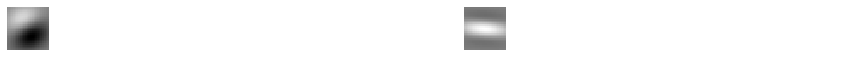

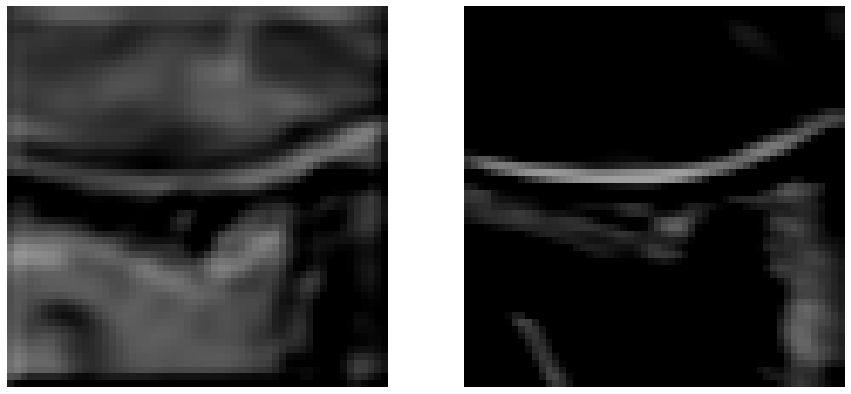

In [115]:

v1_ind=np.array([94, 166])

fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(15,15)
for v1_i, v1_ind_ in enumerate(v1_ind):
    v1_k = v1_model.simple_conv_q0.weight[v1_ind_,:,:,:].numpy().mean(axis=0)
    v1_k = v1_k / np.amax(np.abs(v1_k))/2+0.5
    im_h=ax[v1_i].imshow(v1_k, cmap='gray')
    ax[v1_i].set_xlim([0, 223])
    im_h.set_clim([0, 1])
    ax[v1_i].set_axis_off()
plt.show()


fig, ax = plt.subplots(nrows=1, ncols=len(v1_ind))
fig.set_size_inches(15,15)
max_activations = np.amax(activations[im_ind].numpy())/np.sqrt(2)
for v1_i, v1_ind_ in enumerate(v1_ind):
    v1_im = v1_activations[im_ind,v1_ind_].numpy()
    v1_im = v1_im / max_activations
    im_h=ax[v1_i].imshow(v1_im, cmap='gray')
    im_h.set_clim([0, 1])
    ax[v1_i].set_axis_off()
plt.show()



